#Web Scraping for COVID-19 Data

By now, you have lots of experience processing data and training machine learning models. When data are easily available, like on [Kaggle](https://www.kaggle.com/) or [data.gov](https://www.data.gov/), you're good to go! But what if you can't easily download data?

Of course, one of the most timely applications of machine learning is modeling the direction of the COVID pandemic. **What predictions could you make using detailed COVID data?**

Your county, state, or country probably has a COVID data page. Take a moment to check it out! **What data are available? Can you download them easily to use in your machine learning model?**

A lot of these websites make it really hard for you to get useful data! Today, we'll learn techniques for **web scraping** so that you can gather your own dataset. We'll:

- Explore the HTML of the Illinois COVID-19 site
- Use libraries to parse the HTML and extract the right data
- Convert our data to a nice Pandas data frame

Let's dive in!


#Exploring the Illinois COVID-19 Site
As an example, let's teleport ourselves over to Illinois in April. Here's the state COVID data page:

https://www.dph.illinois.gov/news/202004

**Discuss:**
*  What information could be useful for us?
*  Is it displayed in a useful way?
*  How could we get this data in a nice table format?


##Exercise: Inspecting HTML
To scrape the webpage, we'll first need to understand its structure. Let's explore the page's **HTML** (Hypertext Markup Language), which creates the structure of the webpage.

Open up the Illinois site and open up your web developer tools:
*   In Firefox, choose Tools > Web Developer > Inspector.
*   In Chrome, open up [DevTools](https://developers.google.com/web/tools/chrome-devtools/) using or Command+Option+C (Mac) or Control+Shift+C (Windows, Linux).

**What does HTML look like? What are the different components?**

Try finding a few things:
- Where is the link to the news article from April 26th?
- What link does the "next" button lead to?
- How is HTML organized?

###HTML Tags
Notice that HTML has a tree-like 🌳 🌲 structure, like this:

<img src="https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/figures/Web-Scraping/dom_tree.gif?raw=1">

Each component, or **tag**, gets written like this: <img src="https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/figures/Web-Scraping/tags.png?raw=1" width="512">



<b> This is a tag example, double-click to edit! </b>


You'll notice that tags are organized in divisions called `<div>`. By exploring the Illinois COVID HTML page or editing the tag above, **figure out what each of these tags does!**
* `<!DOCTYPE html>` 
* `<head>`  
* `<title>` 
* `<body>`   
* `<h1>` 
* `<p>`   
* `<a>` 

#Scraping the Illinois Webpage

Now, let's use our knowledge of the page's structure to scrape our data! 

Consider a particular date, like April 24. 

**Discuss:**

- What data would we like to get?
- Which tags contain the important data?

Here's the plan: we're going to use the **requests** library to download the page's HTML, then **BeautifulSoup** to parse it and pick out the tags we need.

<img src='https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/figures/Web-Scraping/scrape-pipeline.png?raw=1' width="1024">

Let's dive in!

In [1]:
#@title Run  to import libraries

from IPython.core.display import display, HTML
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

First, let's set up the URL we're parsing (the April page) and download the page data using `requests.get`.

In [4]:
covid_url = "https://www.dph.illinois.gov/news/202004" #YOUR CODE HERE
covid_response = requests.get(covid_url) #YOUR CODE HERE

What does `covid_response` look like? How about `covid_response.text`?

In [10]:
#YOUR CODE HERE
print(covid_response, '\n')
print(covid_response.text)

<Response [200]> 

<!DOCTYPE html>
<!--[if IEMobile 7]><html class="iem7"  lang="en" dir="ltr"><![endif]-->
<!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7"  lang="en" dir="ltr"><![endif]-->
<!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8"  lang="en" dir="ltr"><![endif]-->
<!--[if IE 8]><html class="lt-ie9"  lang="en" dir="ltr"><![endif]-->
<!--[if (gte IE 9)|(gt IEMobile 7)]><!--><html  lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#"><!--<![endif]-->

<head>
  <meta charset="utf-8" /><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"b1bb1b892b",applicationID:"55445753"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){

The raw text is a little messy! Let's parse the `text` using BeautifulSoup. For `features`, please use `html.parser`.

In [12]:
soup = BeautifulSoup(covid_response.text, features = "html.parser") #YOUR CODE HERE

Now, try printing out `soup`. **Explore (here or at the web page) to discover:**
* How are different days organized within the HTML?
* What kind of `class` indicates a new day, and what tag contains the date?
* Usually, each day's report gets cut off - we don't see the whole thing on the main page. What link do we follow to see the details?

In [ ]:
#YOUR CODE HERE
print(soup)
print(soup)

We're going to extract the following information from the website:
* Count 
* Sex
* Age
* County


##Extracting Data
Now, we know how the page's HTML is formatted. So how do we actually download the data for a particular day - the number of people, their age, and their sex for each county?



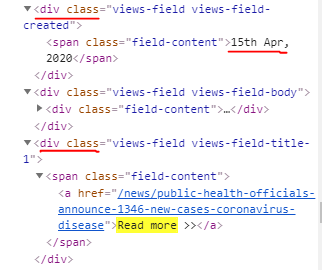

We're going to follow the tree structure in the `soup` object: we'll use `find_all` to find all the `div`, and check the `span` to find the data for a particular date.

Here's the plan:
* Pick a date for the `target_date_str` 
- Find all the `divs` that have the right class name (In the diagram, what kind of `div` contains the `span` element?)
- Check the `span` to see if this is the `div` for the right date!

In [17]:
target_date_str = '29th Apr, 2020' #YOUR CODE HERE

target_div = None
for div in soup.find_all('div', {'class', 'views-field views-field-created'}): #YOUR CODE HERE to fill in class name
    span_text = div.span.get_text()
    if span_text == target_date_str: 
        print ("Found target!")
        target_div = div
        print(target_div)

Found target!
<div class="views-field views-field-created"> <span class="field-content">29th Apr, 2020</span> </div>


All right - we've found the right `<div>` for that date!

To get the full report, we'll have to follow the "Read more" link. Conveniently, we can navigate the tree to find the "Read more" link.

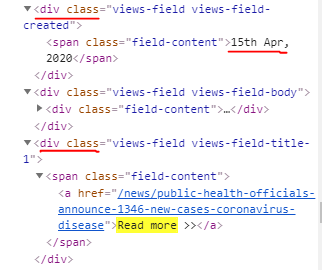

**Discuss:** How does the code below find the right link for the full report?

In [18]:
IDPH_BASE = 'http://www.dph.illinois.gov'
detail_link = IDPH_BASE + target_div.parent.find('span', {'class': 'field-content'}).a.get('href')
print (detail_link)

http://www.dph.illinois.gov/news/public-health-officials-announce-2253-new-cases-coronavirus-disease


Please use `requests` to get the HTML from `detail_link` and `BeautifulSoup` to parse the `content` of the request.

In [22]:
detail_req = requests.get(detail_link) #YOUR CODE HERE
detail_soup = BeautifulSoup(detail_req.content, features = "html.parser") #YOUR CODE HERE
print (detail_soup)

<!DOCTYPE html>

<!--[if IEMobile 7]><html class="iem7"  lang="en" dir="ltr"><![endif]-->
<!--[if lte IE 6]><html class="lt-ie9 lt-ie8 lt-ie7"  lang="en" dir="ltr"><![endif]-->
<!--[if (IE 7)&(!IEMobile)]><html class="lt-ie9 lt-ie8"  lang="en" dir="ltr"><![endif]-->
<!--[if IE 8]><html class="lt-ie9"  lang="en" dir="ltr"><![endif]-->
<!--[if (gte IE 9)|(gt IEMobile 7)]><!--><html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#"><!--<![endif]-->
<head>
<meta charset="utf-8"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"b1bb1b892b",applicationID:"55445753"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={e

Finally, we've obtained the HTML that contains all the data we need! 

But where in this huge mess is the useful information? (Hint: search for "Cook County".)



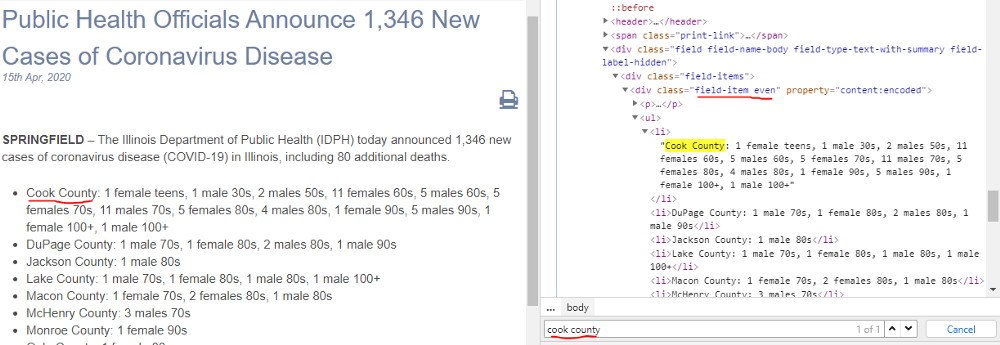

You'll find that the detailed break down is in an unordered list (`<ul> </ul>` tag) under a div class `<field-item even>`. Let's find the right `<div>` and then parse it, then save the results!

In [23]:
news_div = detail_soup.find('div', {'class': 'field-item even'}) #Fill in CLASS_NAME

county_list = []
entries_list = []

for li in news_div.ul.find_all('li'):
    county, text = li.text.split('County')
    entries = text[2:].split(',')
    print (county)
    print (entries)
    #YOUR CODE HERE to add county and entries to lists
    county_list.append(county)
    entries_list.append(entries)

Cook 
['1 male 30s', ' 1 female 40s', ' 3 males 40s', ' 3 females 50s', ' 1 male 50s', ' 8 females 60s', ' 10 males 60s', ' 6 females 70s', ' 11 males 70s', ' 3 females 80s', ' 7 males 80s', ' 4 females 90s', ' 3 males 90s', ' 1 female 100+']
DuPage 
['1 female 80s', ' 1 male 80s', ' 1 male 90s', ' 1 female 100+']
Jasper 
['1 male 90s']
Jefferson 
['1 male 80s', ' 1 male 100+']
Kane 
['1 male 50s', ' 2 females 90s']
Kankakee 
['1 female 90s']
Kendall 
['1 male 90s']
Lake 
['1 male 60s', ' 1 female 70s', ' 1 male 70s', ' 1 male 90s']
Madison 
['1 male 80s']
McHenry 
['1 female 80s', ' 1 male 80s']
Sangamon 
['1 female 80s']
Shelby 
['1 male 70s']
St. Clair 
['1 female 70s', ' 2 males 80s', ' 1 female 90s']
Vermilion 
['1 male 70s']
Will 
['1 male 60s', ' 1 male 70s', ' 2 females 90s']


At last, we have our data for this date!



In [24]:
print (county_list)
print (entries_list)

['Cook ', 'DuPage ', 'Jasper ', 'Jefferson ', 'Kane ', 'Kankakee ', 'Kendall ', 'Lake ', 'Madison ', 'McHenry ', 'Sangamon ', 'Shelby ', 'St. Clair ', 'Vermilion ', 'Will ']
[['1 male 30s', ' 1 female 40s', ' 3 males 40s', ' 3 females 50s', ' 1 male 50s', ' 8 females 60s', ' 10 males 60s', ' 6 females 70s', ' 11 males 70s', ' 3 females 80s', ' 7 males 80s', ' 4 females 90s', ' 3 males 90s', ' 1 female 100+'], ['1 female 80s', ' 1 male 80s', ' 1 male 90s', ' 1 female 100+'], ['1 male 90s'], ['1 male 80s', ' 1 male 100+'], ['1 male 50s', ' 2 females 90s'], ['1 female 90s'], ['1 male 90s'], ['1 male 60s', ' 1 female 70s', ' 1 male 70s', ' 1 male 90s'], ['1 male 80s'], ['1 female 80s', ' 1 male 80s'], ['1 female 80s'], ['1 male 70s'], ['1 female 70s', ' 2 males 80s', ' 1 female 90s'], ['1 male 70s'], ['1 male 60s', ' 1 male 70s', ' 2 females 90s']]


##Challenge Exercise:
Convert `county_list` and `entries_list` to a nicely formatted dataframe. 



In [ ]:
#YOUR CODE HERE for a nice dataframe

**If you're not doing the Challenge Exercise,** run the cell below to see the result!

In [25]:
#@title Run to see the dataframe!
def extract(entry):
    sl = entry.split(' ')
    sl = [s for s in sl if s]
    count = int(sl[0])
    sex = sl[1]
    age = int(sl[2][:len(sl)-1])
    return count, sex, age

counties, counts, sexes, ages = [], [], [], []
for county, entries in zip(county_list, entries_list):
    for entry in entries:
        if entry != '':
          count, sex, age = extract(entry)  # entry is a string like "2 male 50s"
          counties.append(county)
          counts.append(count)
          sexes.append(sex)
          ages.append(age)
        
out = pd.DataFrame(data={'County': counties, 'Count': counts, 'Sex': sexes, 'Age_bracket': ages})
print(out) 

        County  Count      Sex  Age_bracket
0        Cook       1     male           30
1        Cook       1   female           40
2        Cook       3    males           40
3        Cook       3  females           50
4        Cook       1     male           50
5        Cook       8  females           60
6        Cook      10    males           60
7        Cook       6  females           70
8        Cook      11    males           70
9        Cook       3  females           80
10       Cook       7    males           80
11       Cook       4  females           90
12       Cook       3    males           90
13       Cook       1   female           10
14     DuPage       1   female           80
15     DuPage       1     male           80
16     DuPage       1     male           90
17     DuPage       1   female           10
18     Jasper       1     male           90
19  Jefferson       1     male           80
20  Jefferson       1     male           10
21       Kane       1     male  

#Discussion: Scaling Up
We've successful scraped the data for one day! **Discuss: How could we scale up?**

- How could we automatically collect the data for *all* days, not just one?
- Is there other useful information we could scrape?
- How could you apply these techniques to your own local COVID page?
- Now that we have a dataframe with information from one day, what would we need to do to get this information for a date range? What additional considerations do we need to make?

#Optional Discussion: Web Scraping Ethics

Scraping pages can be very useful to us as researchers - but is it always the right thing to do?

**Discuss:**
*   When we scrape a site, we're using the site owner's resources: they're paying for the server. How much scraping is too much?
*   What data should be "fair game" for scraping? Is it ever unethical to scrape data?
*   Does it matter if the site belongs to an individual, company, government, or nonprofit? Does it matter if we're using the data for research, curiosity, or to make money?
*   Does it matter if the site takes technical steps to prevent scraping?
*   Can we rely on data we've scraped for important research, as in healthcare?

Check out [this blog post](https://towardsdatascience.com/ethics-in-web-scraping-b96b18136f01) for a web scraping code of ethics!


#Optional Challenge:

**Apply the techniques you've seen here to scrape another website!** You can also check out some advanced scraping tools:

**[Scrapy](https://scrapy.org)** is a Python framework for large scale web scraping. It gives you all the tools you need to efficiently extract data from websites, process them as you want, and store them in your preferred structure and format.

**[ARGUS](https://github.com/datawizard1337/ARGUS)** is an easy-to-use web mining tool that's built on Scrapy. It is able to crawl a broad range of different websites.

**[Selenium](https://selenium-python.readthedocs.io/index.html)** is an umbrella project encapsulating a variety of tools and libraries enabling web browser automation. Selenium specifically provides infrastructure for the W3C WebDriver specification — a platform and language-neutral coding interface compatible with all major web browsers. We can use it to imitate a user's behaviour and interact with Javascript elements (buttons, sliders etc.).

<img src='https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/figures/Web-Scraping/selenium-pipeline.png?raw=1' width='1024'>


### How to install Selenium
1. If you are using Anaconda: `conda install -c conda-forge selenium `
2. Download the driver for your web browser for [here](https://selenium-python.readthedocs.io/installation.html#drivers). **Note:** Choose a driver that corresponds to your web browser's version. Unzip the file and move the executable to your working directory.

If you'd like, try to repeat our previous work using Selenium!


In [ ]:
#@title Optional: run this to set up Selenium

# # install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# # set options to be headless
import re
import pandas as pd
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# # open it, go to a website, and get results
driver = webdriver.Chrome('chromedriver',options=options)

## Additional resources/references:

* [Document Object Model (DOM)](https://developer.mozilla.org/en-US/docs/Web/API/Document_Object_Model/Introduction)
* [HTML elements reference guide](https://www.w3schools.com/tags/default.asp)
* [About /robots.txt](https://www.robotstxt.org/robotstxt.html)
* [The robots.txt file](https://varvy.com/robottxt.html)
* [Ethics in Web Scraping](https://towardsdatascience.com/ethics-in-web-scraping-b96b18136f01)
* [On the Ethics of Web Scraping](http://robertorocha.info/on-the-ethics-of-web-scraping/)
* [User-Agent](https://en.wikipedia.org/wiki/User_agent)
* [BeautifulSoup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* [Selenium Python - Unofficial documentation](https://selenium-python.readthedocs.io/)
* [ARGUS paper](http://ftp.zew.de/pub/zew-docs/dp/dp18033.pdf)